<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9928265	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.9716587	total: 70ms	remaining: 34.9s
2:	learn: 0.9502117	total: 72.7ms	remaining: 24.2s
3:	learn: 0.9309764	total: 75.9ms	remaining: 18.9s
4:	learn: 0.9145034	total: 77.4ms	remaining: 15.4s
5:	learn: 0.8986050	total: 78.9ms	remaining: 13.1s
6:	learn: 0.8811993	total: 81.2ms	remaining: 11.5s
7:	learn: 0.8645161	total: 83.7ms	remaining: 10.4s
8:	learn: 0.8484047	total: 86ms	remaining: 9.47s
9:	learn: 0.8298633	total: 88.3ms	remaining: 8.74s
10:	learn: 0.8136077	total: 91.5ms	remaining: 8.22s
11:	learn: 0.8002760	total: 95ms	remaining: 7.82s
12:	learn: 0.7881773	total: 101ms	remaining: 7.63s
13:	learn: 0.7712250	total: 111ms	remaining: 7.84s
14:	learn: 0.7572095	total: 118ms	remaining: 7.72s
15:	learn: 0.7423732	total: 120ms	remaining: 7.4s
16:	learn: 0.7303043	total: 123ms	remaining: 7.1s
17:	learn: 0.7171936	total: 125ms	remaining: 6.82s
18:	learn: 0.7033690	total: 127ms	remaining: 6.58s
19:	lear

38:	learn: 0.5106989	total: 177ms	remaining: 4.37s
39:	learn: 0.5037511	total: 180ms	remaining: 4.32s
40:	learn: 0.4974672	total: 183ms	remaining: 4.28s
41:	learn: 0.4915663	total: 186ms	remaining: 4.25s
42:	learn: 0.4844165	total: 189ms	remaining: 4.2s
43:	learn: 0.4772899	total: 193ms	remaining: 4.2s
44:	learn: 0.4701817	total: 197ms	remaining: 4.18s
45:	learn: 0.4644756	total: 199ms	remaining: 4.14s
46:	learn: 0.4597916	total: 202ms	remaining: 4.1s
47:	learn: 0.4541412	total: 205ms	remaining: 4.06s
48:	learn: 0.4492123	total: 207ms	remaining: 4.02s
49:	learn: 0.4439025	total: 209ms	remaining: 3.98s
50:	learn: 0.4398235	total: 212ms	remaining: 3.94s
51:	learn: 0.4343415	total: 214ms	remaining: 3.91s
52:	learn: 0.4293945	total: 217ms	remaining: 3.87s
53:	learn: 0.4255758	total: 219ms	remaining: 3.84s
54:	learn: 0.4207353	total: 222ms	remaining: 3.81s
55:	learn: 0.4169570	total: 224ms	remaining: 3.78s
56:	learn: 0.4127354	total: 227ms	remaining: 3.76s
57:	learn: 0.4081443	total: 230ms	

106:	learn: 0.2893474	total: 351ms	remaining: 2.93s
107:	learn: 0.2876915	total: 353ms	remaining: 2.92s
108:	learn: 0.2862100	total: 356ms	remaining: 2.91s
109:	learn: 0.2854280	total: 359ms	remaining: 2.9s
110:	learn: 0.2839188	total: 361ms	remaining: 2.89s
111:	learn: 0.2825145	total: 364ms	remaining: 2.88s
112:	learn: 0.2805933	total: 366ms	remaining: 2.87s
113:	learn: 0.2791342	total: 368ms	remaining: 2.86s
114:	learn: 0.2780166	total: 370ms	remaining: 2.85s
115:	learn: 0.2766814	total: 373ms	remaining: 2.84s
116:	learn: 0.2755503	total: 374ms	remaining: 2.82s
117:	learn: 0.2743981	total: 376ms	remaining: 2.81s
118:	learn: 0.2738525	total: 378ms	remaining: 2.79s
119:	learn: 0.2730269	total: 379ms	remaining: 2.78s
120:	learn: 0.2722200	total: 381ms	remaining: 2.77s
121:	learn: 0.2714918	total: 383ms	remaining: 2.75s
122:	learn: 0.2701878	total: 385ms	remaining: 2.75s
123:	learn: 0.2699722	total: 387ms	remaining: 2.73s
124:	learn: 0.2694343	total: 389ms	remaining: 2.72s
125:	learn: 0

167:	learn: 0.2323937	total: 508ms	remaining: 2.51s
168:	learn: 0.2314088	total: 512ms	remaining: 2.52s
169:	learn: 0.2307272	total: 515ms	remaining: 2.51s
170:	learn: 0.2300548	total: 518ms	remaining: 2.51s
171:	learn: 0.2294195	total: 520ms	remaining: 2.5s
172:	learn: 0.2285822	total: 522ms	remaining: 2.5s
173:	learn: 0.2279210	total: 525ms	remaining: 2.49s
174:	learn: 0.2274478	total: 528ms	remaining: 2.49s
175:	learn: 0.2268709	total: 529ms	remaining: 2.48s
176:	learn: 0.2264090	total: 532ms	remaining: 2.47s
177:	learn: 0.2254684	total: 535ms	remaining: 2.47s
178:	learn: 0.2247337	total: 537ms	remaining: 2.46s
179:	learn: 0.2240324	total: 540ms	remaining: 2.46s
180:	learn: 0.2231523	total: 543ms	remaining: 2.46s
181:	learn: 0.2227895	total: 546ms	remaining: 2.45s
182:	learn: 0.2221504	total: 548ms	remaining: 2.45s
183:	learn: 0.2214915	total: 551ms	remaining: 2.44s
184:	learn: 0.2212447	total: 553ms	remaining: 2.44s
185:	learn: 0.2204710	total: 555ms	remaining: 2.43s
186:	learn: 0.

222:	learn: 0.2025766	total: 659ms	remaining: 2.29s
223:	learn: 0.2019375	total: 661ms	remaining: 2.29s
224:	learn: 0.2018409	total: 664ms	remaining: 2.29s
225:	learn: 0.2012642	total: 666ms	remaining: 2.28s
226:	learn: 0.2005725	total: 669ms	remaining: 2.28s
227:	learn: 0.2001162	total: 671ms	remaining: 2.27s
228:	learn: 0.1994914	total: 674ms	remaining: 2.27s
229:	learn: 0.1990079	total: 676ms	remaining: 2.26s
230:	learn: 0.1986321	total: 679ms	remaining: 2.26s
231:	learn: 0.1985222	total: 681ms	remaining: 2.25s
232:	learn: 0.1983377	total: 683ms	remaining: 2.25s
233:	learn: 0.1978041	total: 686ms	remaining: 2.25s
234:	learn: 0.1976694	total: 689ms	remaining: 2.24s
235:	learn: 0.1974715	total: 691ms	remaining: 2.24s
236:	learn: 0.1970315	total: 694ms	remaining: 2.23s
237:	learn: 0.1964865	total: 697ms	remaining: 2.23s
238:	learn: 0.1963310	total: 699ms	remaining: 2.23s
239:	learn: 0.1960499	total: 701ms	remaining: 2.22s
240:	learn: 0.1952397	total: 704ms	remaining: 2.22s
241:	learn: 

277:	learn: 0.1809776	total: 831ms	remaining: 2.16s
278:	learn: 0.1805789	total: 834ms	remaining: 2.15s
279:	learn: 0.1803080	total: 836ms	remaining: 2.15s
280:	learn: 0.1801751	total: 839ms	remaining: 2.15s
281:	learn: 0.1795252	total: 841ms	remaining: 2.14s
282:	learn: 0.1791444	total: 844ms	remaining: 2.14s
283:	learn: 0.1787515	total: 846ms	remaining: 2.13s
284:	learn: 0.1785262	total: 848ms	remaining: 2.13s
285:	learn: 0.1779936	total: 850ms	remaining: 2.12s
286:	learn: 0.1775255	total: 860ms	remaining: 2.14s
287:	learn: 0.1771767	total: 865ms	remaining: 2.14s
288:	learn: 0.1770894	total: 869ms	remaining: 2.14s
289:	learn: 0.1765893	total: 871ms	remaining: 2.13s
290:	learn: 0.1765083	total: 875ms	remaining: 2.13s
291:	learn: 0.1760687	total: 877ms	remaining: 2.13s
292:	learn: 0.1755338	total: 879ms	remaining: 2.12s
293:	learn: 0.1750806	total: 882ms	remaining: 2.12s
294:	learn: 0.1746444	total: 884ms	remaining: 2.11s
295:	learn: 0.1745314	total: 888ms	remaining: 2.11s
296:	learn: 

327:	learn: 0.1636821	total: 1s	remaining: 2.05s
328:	learn: 0.1631056	total: 1s	remaining: 2.05s
329:	learn: 0.1629121	total: 1.01s	remaining: 2.04s
330:	learn: 0.1627868	total: 1.01s	remaining: 2.04s
331:	learn: 0.1624577	total: 1.01s	remaining: 2.04s
332:	learn: 0.1623169	total: 1.01s	remaining: 2.03s
333:	learn: 0.1620232	total: 1.02s	remaining: 2.03s
334:	learn: 0.1617458	total: 1.02s	remaining: 2.02s
335:	learn: 0.1615264	total: 1.02s	remaining: 2.02s
336:	learn: 0.1614205	total: 1.02s	remaining: 2.02s
337:	learn: 0.1612041	total: 1.03s	remaining: 2.02s
338:	learn: 0.1611112	total: 1.03s	remaining: 2.01s
339:	learn: 0.1606089	total: 1.03s	remaining: 2.01s
340:	learn: 0.1602438	total: 1.04s	remaining: 2s
341:	learn: 0.1598376	total: 1.04s	remaining: 2s
342:	learn: 0.1596282	total: 1.04s	remaining: 2s
343:	learn: 0.1592425	total: 1.04s	remaining: 1.99s
344:	learn: 0.1589541	total: 1.05s	remaining: 1.99s
345:	learn: 0.1586085	total: 1.05s	remaining: 1.98s
346:	learn: 0.1582565	total

380:	learn: 0.1485995	total: 1.18s	remaining: 1.92s
381:	learn: 0.1483979	total: 1.19s	remaining: 1.92s
382:	learn: 0.1481094	total: 1.19s	remaining: 1.92s
383:	learn: 0.1477601	total: 1.19s	remaining: 1.91s
384:	learn: 0.1473495	total: 1.19s	remaining: 1.91s
385:	learn: 0.1470396	total: 1.2s	remaining: 1.91s
386:	learn: 0.1468727	total: 1.22s	remaining: 1.94s
387:	learn: 0.1465471	total: 1.23s	remaining: 1.94s
388:	learn: 0.1465128	total: 1.23s	remaining: 1.94s
389:	learn: 0.1464358	total: 1.24s	remaining: 1.94s
390:	learn: 0.1462369	total: 1.24s	remaining: 1.93s
391:	learn: 0.1462031	total: 1.24s	remaining: 1.93s
392:	learn: 0.1459172	total: 1.25s	remaining: 1.92s
393:	learn: 0.1455489	total: 1.25s	remaining: 1.92s
394:	learn: 0.1454475	total: 1.27s	remaining: 1.95s
395:	learn: 0.1452093	total: 1.28s	remaining: 1.95s
396:	learn: 0.1448520	total: 1.28s	remaining: 1.94s
397:	learn: 0.1447868	total: 1.28s	remaining: 1.94s
398:	learn: 0.1445295	total: 1.28s	remaining: 1.94s
399:	learn: 0

412:	learn: 0.1411848	total: 1.38s	remaining: 1.96s
413:	learn: 0.1410888	total: 1.38s	remaining: 1.95s
414:	learn: 0.1408991	total: 1.38s	remaining: 1.95s
415:	learn: 0.1405157	total: 1.4s	remaining: 1.96s
416:	learn: 0.1401265	total: 1.4s	remaining: 1.95s
417:	learn: 0.1397468	total: 1.4s	remaining: 1.95s
418:	learn: 0.1394585	total: 1.41s	remaining: 1.95s
419:	learn: 0.1393087	total: 1.41s	remaining: 1.95s
420:	learn: 0.1389356	total: 1.41s	remaining: 1.94s
421:	learn: 0.1387650	total: 1.42s	remaining: 1.94s
422:	learn: 0.1384763	total: 1.42s	remaining: 1.93s
423:	learn: 0.1382688	total: 1.42s	remaining: 1.93s
424:	learn: 0.1379936	total: 1.42s	remaining: 1.93s
425:	learn: 0.1378492	total: 1.43s	remaining: 1.92s
426:	learn: 0.1376848	total: 1.43s	remaining: 1.92s
427:	learn: 0.1375471	total: 1.43s	remaining: 1.91s
428:	learn: 0.1373892	total: 1.44s	remaining: 1.91s
429:	learn: 0.1370289	total: 1.44s	remaining: 1.91s
430:	learn: 0.1368115	total: 1.46s	remaining: 1.92s
431:	learn: 0.1

440:	learn: 0.1340318	total: 1.48s	remaining: 1.88s
441:	learn: 0.1339329	total: 1.49s	remaining: 1.88s
442:	learn: 0.1337877	total: 1.49s	remaining: 1.87s
443:	learn: 0.1337388	total: 1.49s	remaining: 1.87s
444:	learn: 0.1335198	total: 1.5s	remaining: 1.86s
445:	learn: 0.1331956	total: 1.5s	remaining: 1.86s
446:	learn: 0.1329442	total: 1.5s	remaining: 1.86s
447:	learn: 0.1328405	total: 1.5s	remaining: 1.85s
448:	learn: 0.1325912	total: 1.51s	remaining: 1.85s
449:	learn: 0.1323084	total: 1.51s	remaining: 1.84s
450:	learn: 0.1321826	total: 1.51s	remaining: 1.84s
451:	learn: 0.1319703	total: 1.51s	remaining: 1.83s
452:	learn: 0.1317794	total: 1.52s	remaining: 1.83s
453:	learn: 0.1314870	total: 1.52s	remaining: 1.83s
454:	learn: 0.1312159	total: 1.52s	remaining: 1.82s
455:	learn: 0.1308573	total: 1.54s	remaining: 1.84s
456:	learn: 0.1305153	total: 1.54s	remaining: 1.84s
457:	learn: 0.1303842	total: 1.55s	remaining: 1.83s
458:	learn: 0.1302834	total: 1.55s	remaining: 1.83s
459:	learn: 0.12

481:	learn: 0.1259383	total: 1.64s	remaining: 1.76s
482:	learn: 0.1256564	total: 1.64s	remaining: 1.76s
483:	learn: 0.1255495	total: 1.64s	remaining: 1.75s
484:	learn: 0.1251768	total: 1.65s	remaining: 1.75s
485:	learn: 0.1249566	total: 1.65s	remaining: 1.74s
486:	learn: 0.1247124	total: 1.65s	remaining: 1.74s
487:	learn: 0.1244481	total: 1.65s	remaining: 1.74s
488:	learn: 0.1244303	total: 1.66s	remaining: 1.73s
489:	learn: 0.1242384	total: 1.66s	remaining: 1.73s
490:	learn: 0.1240509	total: 1.66s	remaining: 1.73s
491:	learn: 0.1240238	total: 1.67s	remaining: 1.72s
492:	learn: 0.1236885	total: 1.67s	remaining: 1.72s
493:	learn: 0.1235631	total: 1.67s	remaining: 1.71s
494:	learn: 0.1235002	total: 1.67s	remaining: 1.71s
495:	learn: 0.1232928	total: 1.68s	remaining: 1.7s
496:	learn: 0.1229349	total: 1.68s	remaining: 1.7s
497:	learn: 0.1227088	total: 1.68s	remaining: 1.69s
498:	learn: 0.1225696	total: 1.68s	remaining: 1.69s
499:	learn: 0.1224290	total: 1.69s	remaining: 1.69s
500:	learn: 0.

525:	learn: 0.1169390	total: 1.82s	remaining: 1.64s
526:	learn: 0.1168185	total: 1.83s	remaining: 1.64s
527:	learn: 0.1166302	total: 1.83s	remaining: 1.64s
528:	learn: 0.1163239	total: 1.83s	remaining: 1.63s
529:	learn: 0.1159386	total: 1.83s	remaining: 1.63s
530:	learn: 0.1157954	total: 1.83s	remaining: 1.62s
531:	learn: 0.1156199	total: 1.84s	remaining: 1.62s
532:	learn: 0.1153962	total: 1.84s	remaining: 1.61s
533:	learn: 0.1151837	total: 1.84s	remaining: 1.61s
534:	learn: 0.1147827	total: 1.85s	remaining: 1.61s
535:	learn: 0.1146914	total: 1.86s	remaining: 1.61s
536:	learn: 0.1144290	total: 1.86s	remaining: 1.6s
537:	learn: 0.1140592	total: 1.86s	remaining: 1.6s
538:	learn: 0.1140250	total: 1.86s	remaining: 1.59s
539:	learn: 0.1138241	total: 1.86s	remaining: 1.59s
540:	learn: 0.1136266	total: 1.87s	remaining: 1.58s
541:	learn: 0.1134628	total: 1.87s	remaining: 1.58s
542:	learn: 0.1133100	total: 1.87s	remaining: 1.57s
543:	learn: 0.1131189	total: 1.87s	remaining: 1.57s
544:	learn: 0.

571:	learn: 0.1078287	total: 1.95s	remaining: 1.46s
572:	learn: 0.1076668	total: 1.95s	remaining: 1.45s
573:	learn: 0.1075559	total: 1.95s	remaining: 1.45s
574:	learn: 0.1073444	total: 1.96s	remaining: 1.45s
575:	learn: 0.1070256	total: 1.96s	remaining: 1.44s
576:	learn: 0.1069141	total: 1.96s	remaining: 1.44s
577:	learn: 0.1067011	total: 1.96s	remaining: 1.43s
578:	learn: 0.1064618	total: 1.97s	remaining: 1.43s
579:	learn: 0.1064493	total: 1.97s	remaining: 1.43s
580:	learn: 0.1061432	total: 1.97s	remaining: 1.42s
581:	learn: 0.1059387	total: 1.97s	remaining: 1.42s
582:	learn: 0.1058851	total: 1.98s	remaining: 1.41s
583:	learn: 0.1057894	total: 1.98s	remaining: 1.41s
584:	learn: 0.1057239	total: 1.98s	remaining: 1.41s
585:	learn: 0.1055791	total: 1.99s	remaining: 1.4s
586:	learn: 0.1054231	total: 1.99s	remaining: 1.4s
587:	learn: 0.1053148	total: 1.99s	remaining: 1.39s
588:	learn: 0.1050564	total: 1.99s	remaining: 1.39s
589:	learn: 0.1048176	total: 1.99s	remaining: 1.39s
590:	learn: 0.

639:	learn: 0.0966128	total: 2.13s	remaining: 1.2s
640:	learn: 0.0965254	total: 2.13s	remaining: 1.19s
641:	learn: 0.0964023	total: 2.13s	remaining: 1.19s
642:	learn: 0.0963913	total: 2.13s	remaining: 1.18s
643:	learn: 0.0963006	total: 2.13s	remaining: 1.18s
644:	learn: 0.0960521	total: 2.14s	remaining: 1.18s
645:	learn: 0.0958767	total: 2.14s	remaining: 1.17s
646:	learn: 0.0957461	total: 2.14s	remaining: 1.17s
647:	learn: 0.0956499	total: 2.15s	remaining: 1.17s
648:	learn: 0.0955112	total: 2.15s	remaining: 1.16s
649:	learn: 0.0952814	total: 2.15s	remaining: 1.16s
650:	learn: 0.0951885	total: 2.15s	remaining: 1.15s
651:	learn: 0.0950622	total: 2.15s	remaining: 1.15s
652:	learn: 0.0949612	total: 2.16s	remaining: 1.15s
653:	learn: 0.0948055	total: 2.16s	remaining: 1.14s
654:	learn: 0.0946499	total: 2.16s	remaining: 1.14s
655:	learn: 0.0943297	total: 2.17s	remaining: 1.14s
656:	learn: 0.0941963	total: 2.17s	remaining: 1.13s
657:	learn: 0.0940614	total: 2.17s	remaining: 1.13s
658:	learn: 0

707:	learn: 0.0862327	total: 2.3s	remaining: 949ms
708:	learn: 0.0861784	total: 2.31s	remaining: 946ms
709:	learn: 0.0860337	total: 2.31s	remaining: 942ms
710:	learn: 0.0858396	total: 2.31s	remaining: 939ms
711:	learn: 0.0856962	total: 2.31s	remaining: 935ms
712:	learn: 0.0854836	total: 2.31s	remaining: 932ms
713:	learn: 0.0853736	total: 2.32s	remaining: 929ms
714:	learn: 0.0852160	total: 2.33s	remaining: 927ms
715:	learn: 0.0851131	total: 2.33s	remaining: 926ms
716:	learn: 0.0849695	total: 2.34s	remaining: 923ms
717:	learn: 0.0849400	total: 2.34s	remaining: 919ms
718:	learn: 0.0847653	total: 2.34s	remaining: 916ms
719:	learn: 0.0846449	total: 2.34s	remaining: 912ms
720:	learn: 0.0844785	total: 2.35s	remaining: 908ms
721:	learn: 0.0842902	total: 2.35s	remaining: 905ms
722:	learn: 0.0842522	total: 2.35s	remaining: 901ms
723:	learn: 0.0840666	total: 2.36s	remaining: 899ms
724:	learn: 0.0839734	total: 2.36s	remaining: 896ms
725:	learn: 0.0838551	total: 2.37s	remaining: 893ms
726:	learn: 0

757:	learn: 0.0792222	total: 2.46s	remaining: 786ms
758:	learn: 0.0791153	total: 2.46s	remaining: 783ms
759:	learn: 0.0790128	total: 2.47s	remaining: 779ms
760:	learn: 0.0789145	total: 2.47s	remaining: 775ms
761:	learn: 0.0788530	total: 2.47s	remaining: 772ms
762:	learn: 0.0787696	total: 2.47s	remaining: 769ms
763:	learn: 0.0785754	total: 2.48s	remaining: 765ms
764:	learn: 0.0784865	total: 2.48s	remaining: 762ms
765:	learn: 0.0783134	total: 2.48s	remaining: 758ms
766:	learn: 0.0782309	total: 2.48s	remaining: 755ms
767:	learn: 0.0780657	total: 2.49s	remaining: 751ms
768:	learn: 0.0778818	total: 2.49s	remaining: 748ms
769:	learn: 0.0777042	total: 2.49s	remaining: 744ms
770:	learn: 0.0776381	total: 2.49s	remaining: 741ms
771:	learn: 0.0774486	total: 2.5s	remaining: 738ms
772:	learn: 0.0772341	total: 2.5s	remaining: 734ms
773:	learn: 0.0770630	total: 2.5s	remaining: 730ms
774:	learn: 0.0768912	total: 2.5s	remaining: 727ms
775:	learn: 0.0768248	total: 2.51s	remaining: 724ms
776:	learn: 0.07

825:	learn: 0.0708175	total: 2.64s	remaining: 556ms
826:	learn: 0.0707081	total: 2.64s	remaining: 553ms
827:	learn: 0.0705442	total: 2.64s	remaining: 549ms
828:	learn: 0.0704910	total: 2.65s	remaining: 546ms
829:	learn: 0.0703867	total: 2.65s	remaining: 543ms
830:	learn: 0.0701997	total: 2.65s	remaining: 540ms
831:	learn: 0.0700492	total: 2.66s	remaining: 536ms
832:	learn: 0.0699315	total: 2.66s	remaining: 533ms
833:	learn: 0.0698531	total: 2.66s	remaining: 530ms
834:	learn: 0.0697831	total: 2.67s	remaining: 527ms
835:	learn: 0.0696651	total: 2.67s	remaining: 523ms
836:	learn: 0.0695421	total: 2.67s	remaining: 520ms
837:	learn: 0.0694581	total: 2.67s	remaining: 517ms
838:	learn: 0.0693017	total: 2.67s	remaining: 513ms
839:	learn: 0.0692092	total: 2.68s	remaining: 510ms
840:	learn: 0.0690813	total: 2.68s	remaining: 507ms
841:	learn: 0.0689428	total: 2.68s	remaining: 503ms
842:	learn: 0.0688857	total: 2.68s	remaining: 500ms
843:	learn: 0.0686971	total: 2.69s	remaining: 497ms
844:	learn: 

893:	learn: 0.0629495	total: 2.82s	remaining: 334ms
894:	learn: 0.0628879	total: 2.82s	remaining: 331ms
895:	learn: 0.0627882	total: 2.83s	remaining: 328ms
896:	learn: 0.0626979	total: 2.83s	remaining: 325ms
897:	learn: 0.0626386	total: 2.83s	remaining: 321ms
898:	learn: 0.0624628	total: 2.83s	remaining: 318ms
899:	learn: 0.0624033	total: 2.83s	remaining: 315ms
900:	learn: 0.0623503	total: 2.84s	remaining: 312ms
901:	learn: 0.0622062	total: 2.84s	remaining: 309ms
902:	learn: 0.0621620	total: 2.85s	remaining: 306ms
903:	learn: 0.0620791	total: 2.85s	remaining: 302ms
904:	learn: 0.0619343	total: 2.85s	remaining: 299ms
905:	learn: 0.0618390	total: 2.85s	remaining: 296ms
906:	learn: 0.0617806	total: 2.85s	remaining: 293ms
907:	learn: 0.0615979	total: 2.86s	remaining: 289ms
908:	learn: 0.0615537	total: 2.86s	remaining: 286ms
909:	learn: 0.0615218	total: 2.86s	remaining: 283ms
910:	learn: 0.0614541	total: 2.86s	remaining: 280ms
911:	learn: 0.0613740	total: 2.87s	remaining: 277ms
912:	learn: 

951:	learn: 0.0575726	total: 2.99s	remaining: 151ms
952:	learn: 0.0574744	total: 2.99s	remaining: 148ms
953:	learn: 0.0574054	total: 3s	remaining: 144ms
954:	learn: 0.0573200	total: 3s	remaining: 141ms
955:	learn: 0.0572706	total: 3s	remaining: 138ms
956:	learn: 0.0571172	total: 3s	remaining: 135ms
957:	learn: 0.0569832	total: 3.01s	remaining: 132ms
958:	learn: 0.0568897	total: 3.01s	remaining: 129ms
959:	learn: 0.0568080	total: 3.01s	remaining: 125ms
960:	learn: 0.0567191	total: 3.01s	remaining: 122ms
961:	learn: 0.0566164	total: 3.02s	remaining: 119ms
962:	learn: 0.0565890	total: 3.02s	remaining: 116ms
963:	learn: 0.0565146	total: 3.02s	remaining: 113ms
964:	learn: 0.0564477	total: 3.02s	remaining: 110ms
965:	learn: 0.0563002	total: 3.02s	remaining: 106ms
966:	learn: 0.0561996	total: 3.03s	remaining: 103ms
967:	learn: 0.0561098	total: 3.03s	remaining: 100ms
968:	learn: 0.0560694	total: 3.03s	remaining: 97ms
969:	learn: 0.0559827	total: 3.04s	remaining: 93.9ms
970:	learn: 0.0558997	to

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.21419521939664263
ABC Pre-generator MAE 0.9085759916239997


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

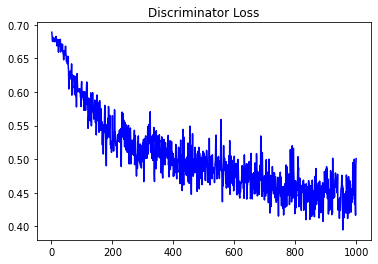

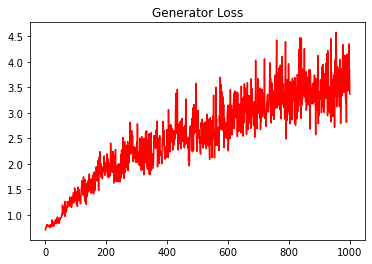

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2525680473761852


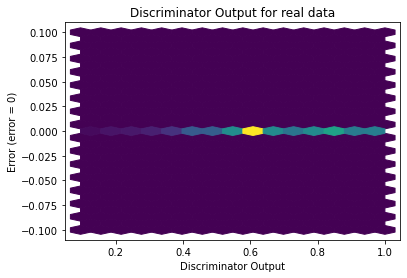

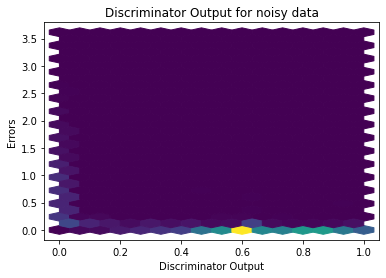

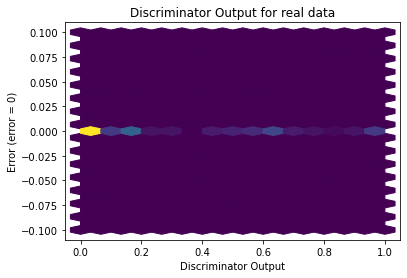

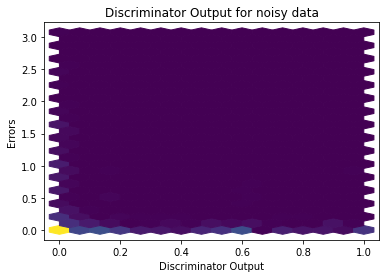

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())